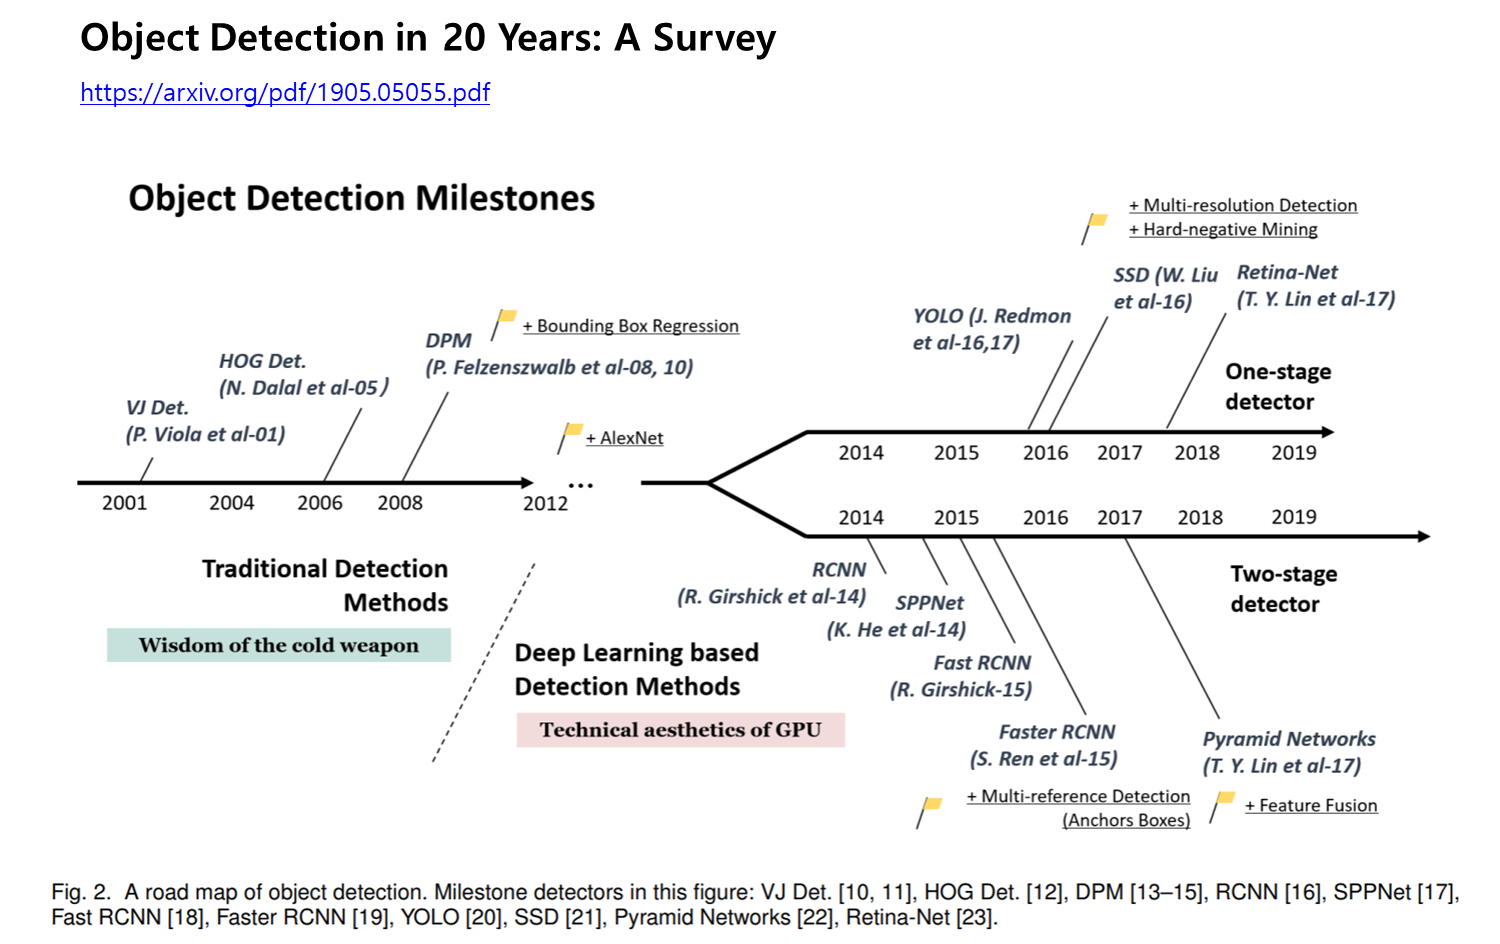

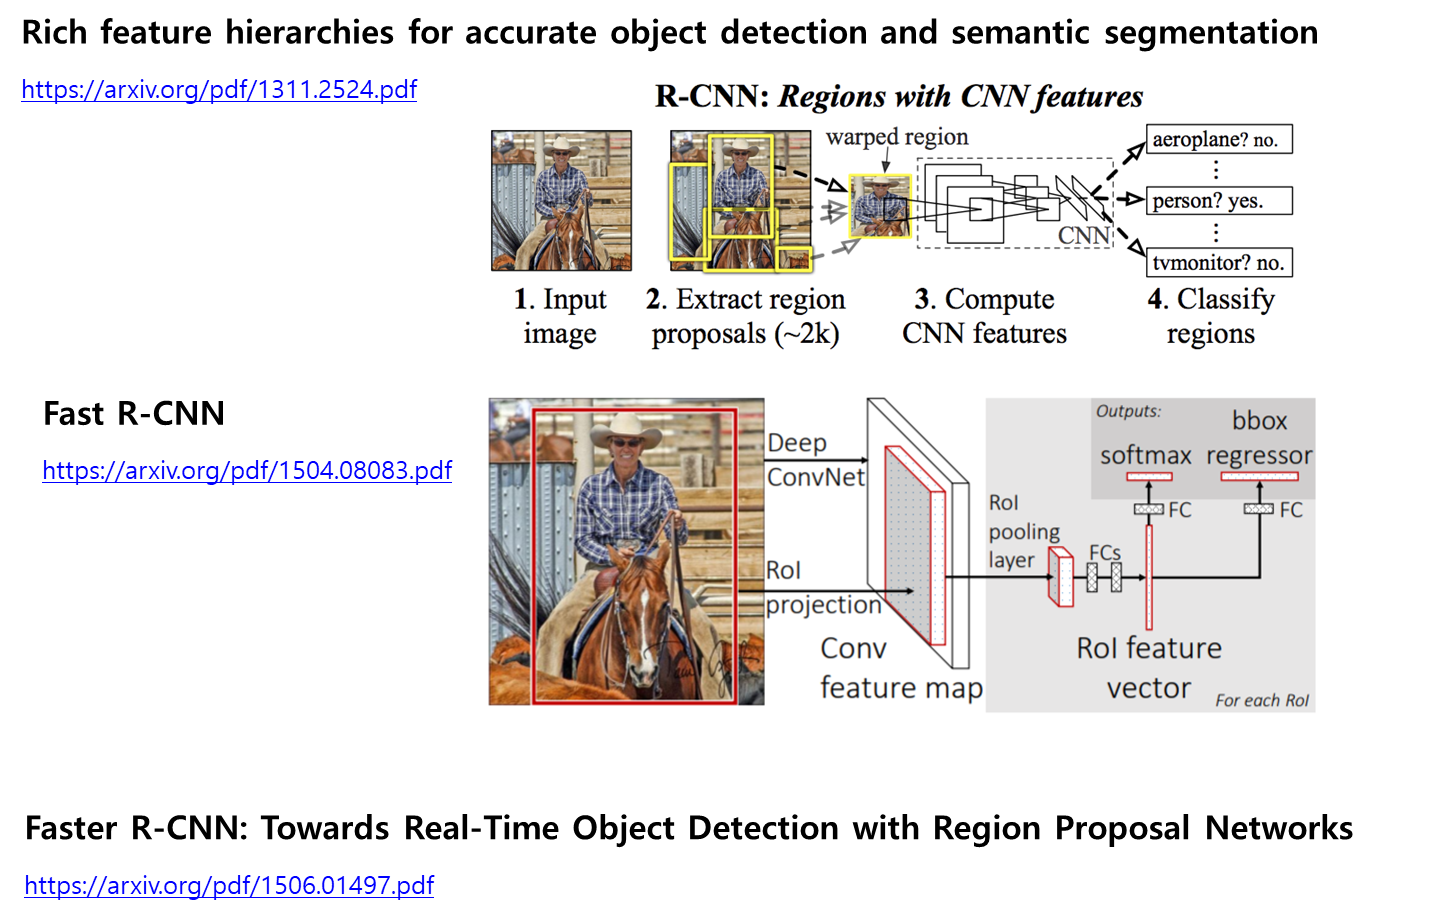

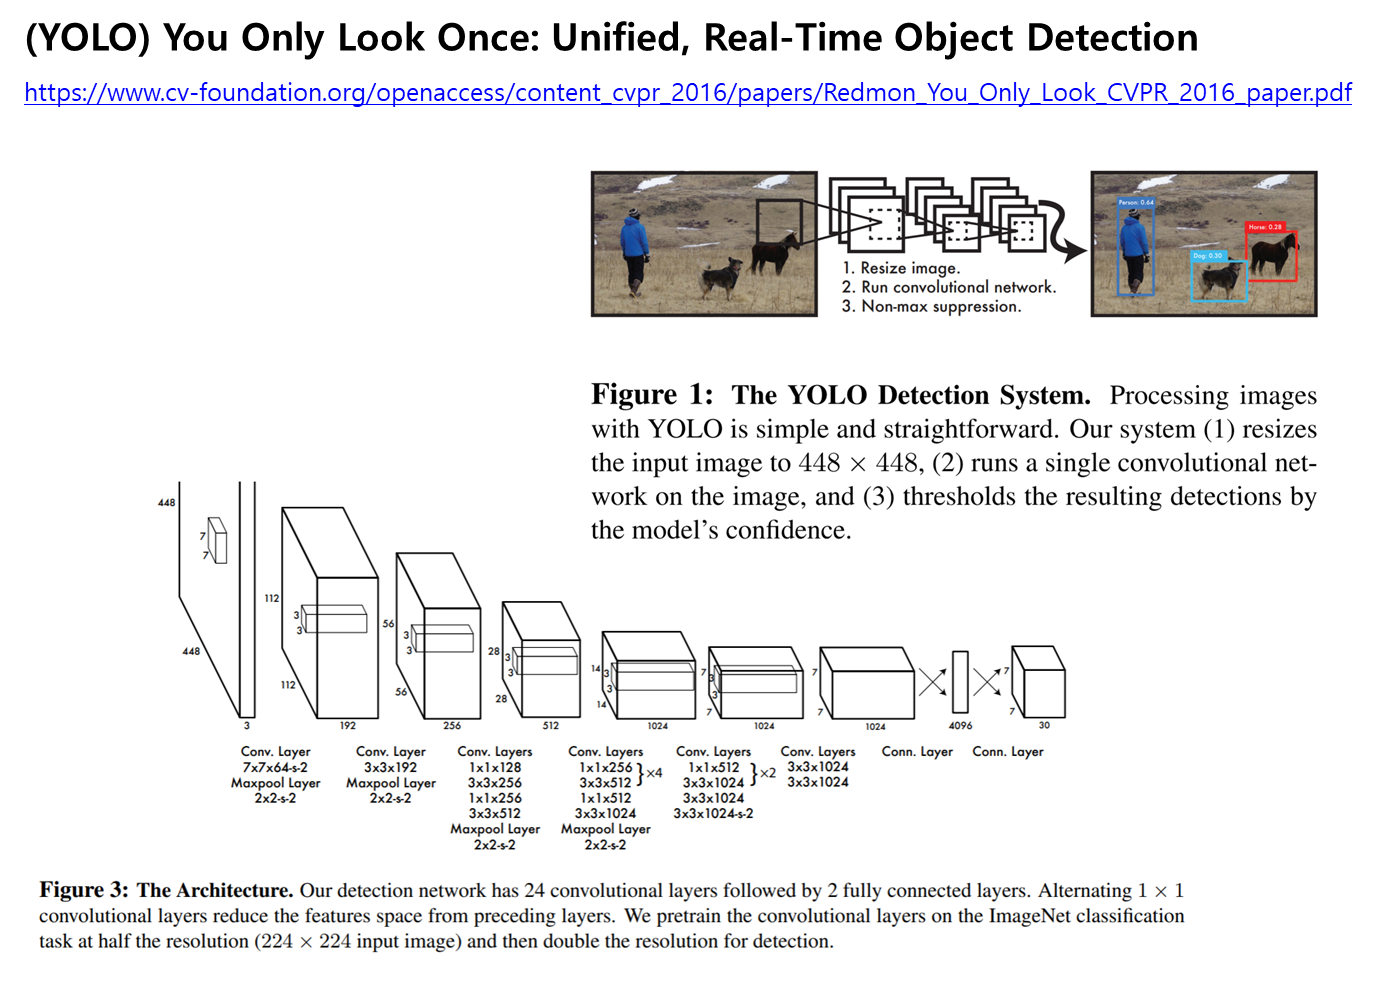

In [ ]:
!wget "https://hycms.hanyang.ac.kr/index.php?module=xn_media_content2013&act=dispXn_media_content2013DownloadContent&content_id=6715e0982d404" -O "data.zip"
!unzip  -O cp949 "data.zip" -d "data"

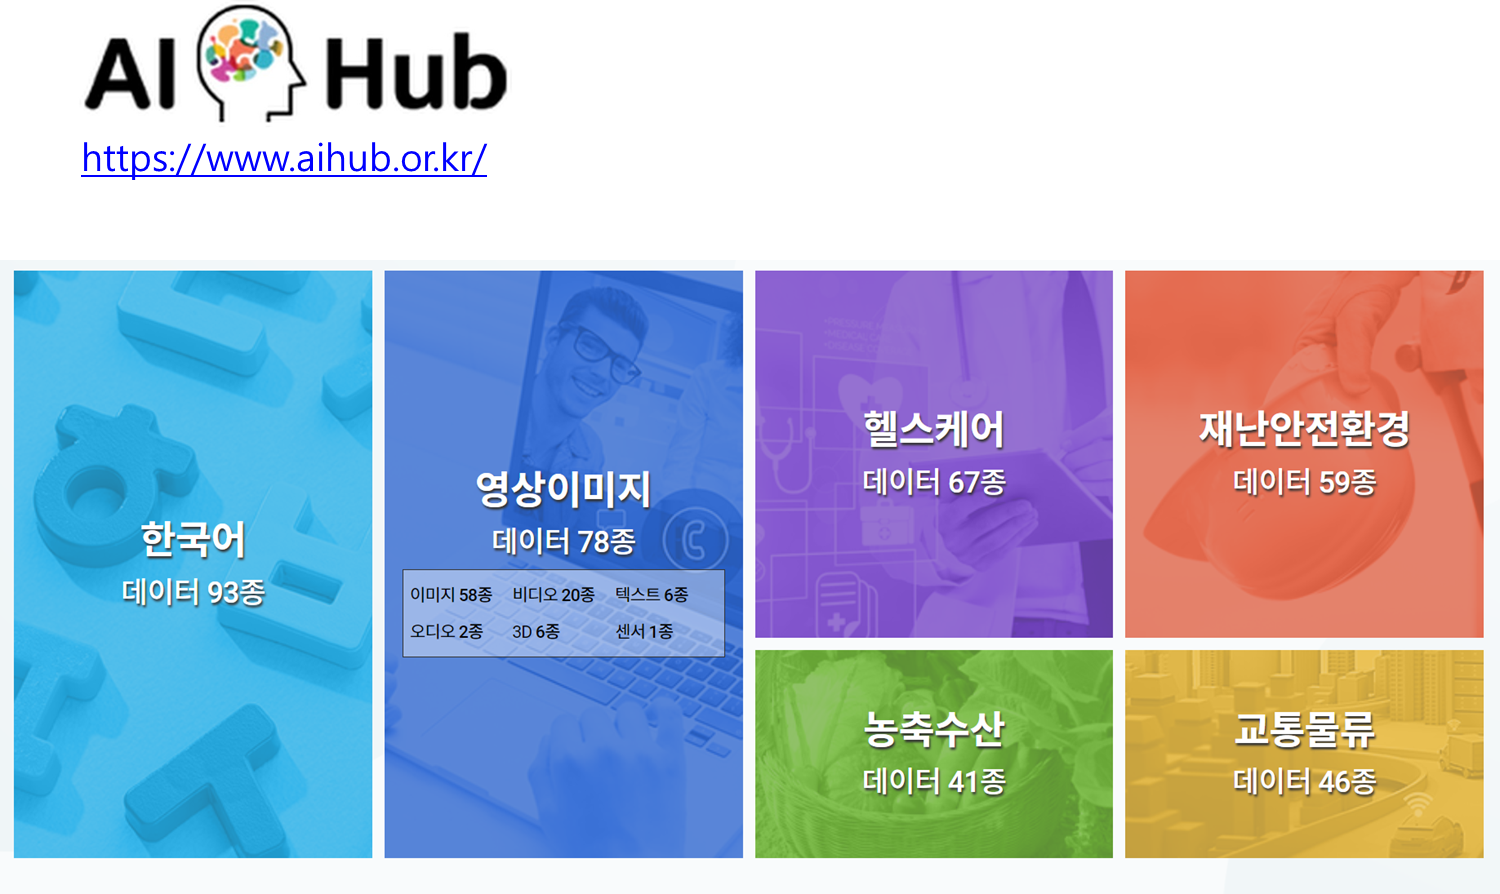

**모델**

https://github.com/ultralytics/yolov5

**데이터**

https://aihub.or.kr/aihubdata/data/view.do?currMenu=115&topMenu=100&aihubDataSe=realm&dataSetSn=165

In [ ]:
import os
#yolov5 소스코드를 깃헙에서 다운
!git clone https://github.com/ultralytics/yolov5  # clone
os.chdir('yolov5/')
!pip install -r requirements.txt  # install

In [ ]:
#사전 학습 가중치를 다운로드

!wget https://github.com/ultralytics/yolov5/releases/download/v5.0/yolov5s.pt
os.chdir('../')

In [ ]:
#라이브러리 다운

import numpy as np
from glob import glob
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import ipywidgets
import json

In [ ]:
#ai hub 학습 데이터 불러오기 (일부만)

flist = glob('data/traffic/*.jpg')


with open('data/traffic/웨스턴파크 (부천역전우체국 건너편)_BC2000102.json', 'r') as f:
    json_data = json.load(f)

len(json_data['images'])

In [ ]:
#ai hub 학습 데이터 annotation 박스 출력용 함수
def diplay_labeling_data(idx=0):
  global flist
  img = Image.open(flist[idx])


  img_id = list(filter(lambda x:x["file_name"]=='BC2000102/' + flist[idx].split('/')[-1],json_data['images']))[0]['id']
  annotation = list(filter(lambda x:x["id"]==img_id,json_data['annotations']))

  for bbox in annotation[0]['bbox']:
    draw = ImageDraw.Draw(img)
    draw.rectangle(bbox, outline=(0,255,0), width = 3)

  img = np.array(img)
  plt.figure(figsize=(img.shape[1]/100, img.shape[0]/100))
  plt.imshow(img)
  print(annotation[0]['category_id'])

In [ ]:
# 라벨링 데이터 확인하기
ipywidgets.interact(diplay_labeling_data, idx=(0, len(flist)-1, 1) )

In [ ]:
# yolo v5 로 검출하기
!python yolov5/detect.py --weights yolov5/yolov5s.pt --img 1920 --conf 0.5 --source data/traffic

In [ ]:
# yolo v5 로 검출 결과 이미지 리스트 불러오기
flist = glob('yolov5/runs/detect/exp/*')

In [ ]:
#yolo 검출 결과 출력용 함수
def display_yolo_result(idx=0):
  global flist
  img = Image.open(flist[idx])
  img = np.array(img)


  plt.figure(figsize=(img.shape[1]/100, img.shape[0]/100))
  plt.imshow(img)
  plt.show()

In [ ]:
#위젯을 이용하여  검증 결과 출력하기
ipywidgets.interact(display_yolo_result, idx=(0, len(flist)-1, 1) )
